# Assignment 2:
    test if the distribution of ages is the same for 
    
    1) male and female riders
    
    2) day and night riders
    
    use 3 tests: KS, Pearson's, Spearman's. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a significant threshold for the whole eercise. 
    
   ## Note that we're going to use $\alpha = 0.05$ for the whole exercise
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [1]:
#!printenv
import os
print os.getenv('PUI2016')
print os.getenv('PUIDATA')


/Users/ian/school/hw/PUI2016
/Users/ian/school/hw/PUI2016/PUIDATA


In [2]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json
s = json.load(open(os.getenv('PUI2016') + "/fbb_matplotlibrc.json") )
pl.rcParams.update(s)



Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# I am reading in data from January 2015. It would be a good idea to use data from warmer months, since there are more riders in the warm weather and the more data the smaller the STATISTICAL NOISE. You should use data from multiple months, joining multiple datasets, thus addressing systematic errors as well

### Ian's NOTE: I'm changing to use data from May 2016

In [5]:
datestring = '201605'
getCitiBikeCSV(datestring)

('Downloading', '201605')
file in place, you can continue


In [6]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,538,5/1/2016 00:00:03,5/1/2016 00:09:02,536,1 Ave & E 30 St,40.741444,-73.975361,497,E 17 St & Broadway,40.737050,-73.990093,23097,Subscriber,1986.0,2
1,224,5/1/2016 00:00:04,5/1/2016 00:03:49,361,Allen St & Hester St,40.716059,-73.991908,340,Madison St & Clinton St,40.712690,-73.987763,23631,Subscriber,1977.0,1
2,328,5/1/2016 00:00:14,5/1/2016 00:05:43,301,E 2 St & Avenue B,40.722174,-73.983688,311,Norfolk St & Broome St,40.717227,-73.988021,23049,Subscriber,1980.0,1
3,1196,5/1/2016 00:00:20,5/1/2016 00:20:17,3141,1 Ave & E 68 St,40.765005,-73.958185,237,E 11 St & 2 Ave,40.730473,-73.986724,19019,Customer,NaN,0
4,753,5/1/2016 00:00:26,5/1/2016 00:13:00,492,W 33 St & 7 Ave,40.750200,-73.990931,228,E 48 St & 3 Ave,40.754601,-73.971879,16437,Subscriber,1981.0,1


In [7]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,538,5/1/2016 00:00:03,5/1/2016 00:09:02,536,1 Ave & E 30 St,40.741444,-73.975361,497,E 17 St & Broadway,40.737050,-73.990093,23097,Subscriber,1986.0,2,2016-05-01 00:00:03
1,224,5/1/2016 00:00:04,5/1/2016 00:03:49,361,Allen St & Hester St,40.716059,-73.991908,340,Madison St & Clinton St,40.712690,-73.987763,23631,Subscriber,1977.0,1,2016-05-01 00:00:04
2,328,5/1/2016 00:00:14,5/1/2016 00:05:43,301,E 2 St & Avenue B,40.722174,-73.983688,311,Norfolk St & Broome St,40.717227,-73.988021,23049,Subscriber,1980.0,1,2016-05-01 00:00:14
3,1196,5/1/2016 00:00:20,5/1/2016 00:20:17,3141,1 Ave & E 68 St,40.765005,-73.958185,237,E 11 St & 2 Ave,40.730473,-73.986724,19019,Customer,NaN,0,2016-05-01 00:00:20
4,753,5/1/2016 00:00:26,5/1/2016 00:13:00,492,W 33 St & 7 Ave,40.750200,-73.990931,228,E 48 St & 3 Ave,40.754601,-73.971879,16437,Subscriber,1981.0,1,2016-05-01 00:00:26


In [9]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

# BY GENDER
splitting data by gender and extracting the age happens in the cell below

In [15]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2016 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2016 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [18]:
#dropping some data I no longer need
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'usertype', 'birth year', 'gender', 'date'], axis=1, inplace=True)
df.head()

,ageM,ageF
0,NaN,30.0
1,39.0,NaN
2,36.0,NaN
3,NaN,NaN
4,35.0,NaN


In [108]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df.describe()

,ageM,ageF
count,783687.000000,249831.000000
mean,38.942728,37.511414
std,11.613073,11.405464
min,16.000000,16.000000
25%,30.000000,28.000000
50%,37.000000,34.000000
75%,47.000000,46.000000
max,131.000000,122.000000


In [109]:
# dropping NaN values
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)
df.head()

,ageM,ageF
0,NaN,30.0
1,39.0,NaN
2,36.0,NaN
3,NaN,NaN
4,35.0,NaN


lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

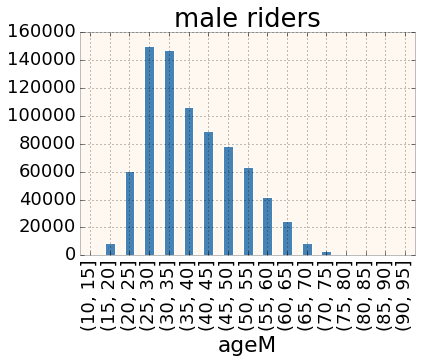

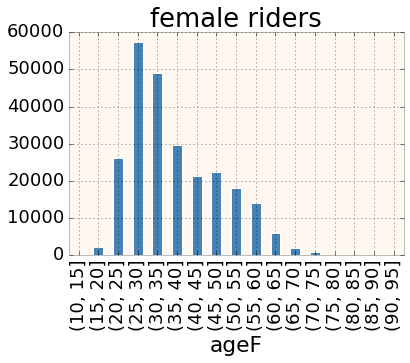

In [110]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders")


# Figure 1: histogrammed distribution of riders' ages by gender

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.002288
(20, 25]       0.024948
(25, 30]       0.063042
(30, 35]       0.071917
(35, 40]       0.055387
(40, 45]       0.026978
(45, 50]       0.016997
(50, 55]       0.009177
(55, 60]       0.011903
(60, 65]       0.004866
(65, 70]       0.001525
(70, 75]       0.000293
(75, 80]       0.000072
(80, 85]       0.000032
(85, 90]       0.000013
(90, 95]       0.000000


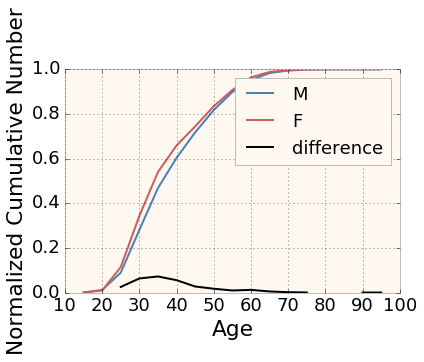

In [111]:
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()
csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

# difference in normalized cumsums between men and women
print (np.abs((csM / csM.max()) - (csF / csF.max())))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()



# Figure 2: the cumulative distribution of CitiBike riders' ages by gender

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statement such as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [45]:
import scipy.stats as stats

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html


In [112]:
ks = scipy.stats.ks_2samp(df.ageM[~np.isnan(df.ageM)], df.ageF[~np.isnan(df.ageF)])
print (ks)

Ks_2sampResult(statistic=0.072848740077022855, pvalue=0.0)


# FILL IN THE CELL BELOW!

In [38]:
## your words here!...
## this cell is for you to tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS
## to do that refer to the scipy documentation to understand the output of the scipy.stats.ks_2samp function

#### KS
For a two-sample KS-test, the null hypothesis is that the underlying continuous distributions of each sample are identical, at a 1-alpha confidence level.

Remember from above that we've chosen $\alpha = 0.05$

In [156]:
# according to the KS table (http://www.real-statistics.com/statistics-tables/kolmogorov-smirnov-table/)
# the critical value for n > 50 @ alpha = 0.05 is:
critical = 1.36 / np.sqrt(len(df.ageM[~np.isnan(df.ageM)]))
print critical

0.00153627013172


We reject the NULL HYPOTHESIS if our reported $D_{KS} > critical$

In this case, 0.07 > 0.002, so we REJECT null hypothesis --> conclude that the age distributions for citibike riders of male and female genders actually follow DIFFERENT DISTRIBUTIONS.

To support that idea, we also see a p-value that is much smaller than our required 0.05 alpha.
- - - - - - - - - -

The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

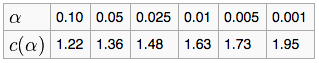

In [17]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
Image(filename="../plotsforclasses/ks2sample_table.png")

# Now redo the test with a subsample of the data: take only 1 ride every of 200 

In [160]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS

# first reduce the sample size
df_reduct = df[df.index % 200 == 0]
print 'original df length: ', len(df)
print 'reducted df length: ', len(df_reduct)

# reset the critical value for new sample size
critical = 1.36 / np.sqrt(len(df_reduct.ageF[~np.isnan(df_reduct.ageF)]))
print 'critical value: ', critical

ks_reduct = scipy.stats.ks_2samp(df_reduct.ageF[~np.isnan(df_reduct.ageF)], df_reduct.ageF[~np.isnan(df_reduct.ageF)])
print (ks_reduct)
print 'p-value: ', ks_reduct[1]

original df length:  1212280
reducted df length:  6062
critical value:  0.0383746200629
Ks_2sampResult(statistic=0.0, pvalue=1.0)
p-value:  1.0


In this case, our sample size has become so small that a) the p-value has shot up way beyond alpha, and b) our D statistics is reported at 0.

We are NOT able to reject our null hypothesis.

# Pearson's  test for correlation

## notice that the Pearson's is a pairwise test: the samples need to be 
## a. sorted and 
## b. the same size!

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [90]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis
male_sorted = df.ageM[~np.isnan(df.ageM)].sort_values().reset_index(drop=True)
female_sorted = df.ageF[~np.isnan(df.ageF)].sort_values().reset_index(drop=True)

# check length of each
print 'male: ', len(male_sorted)
print 'female: ', len(female_sorted)

male:  783687
female:  249831


In [91]:
# we need to filter the male dataset to be the same length as female dataset, but still maintain it's distribution
# take every third male observation:
male_sorted = male_sorted[male_sorted.index % 3 == 0].reset_index(drop=True)
print 'male: ', len(male_sorted)
print 'diff: ', len(male_sorted) - len(female_sorted)

male:  261229
diff:  11398


In [92]:
# strip out 11,323 more observations (this is NOT a perfect method, and it will impact the male
# distribution a little bit, but hopefully is still a reasonable approximation)
male_sorted = male_sorted[male_sorted.index % 23 != 0].reset_index(drop=True)
print 'male: ', len(male_sorted)
print 'diff: ', len(male_sorted) - len(female_sorted)

male:  249871
diff:  40


In [93]:
# strip out 40 more more observations
male_sorted = male_sorted[male_sorted.index % 6246 != 0].reset_index(drop=True)
print 'male: ', len(male_sorted)
print 'diff: ', len(male_sorted) - len(female_sorted)

male:  249830
diff:  -1


In [95]:
# drop one more from female...
female_sorted.drop([0], axis=0, inplace=True)

In [101]:
# Pearson's correlation test will return a coefficent of correlation between -1 and 1
# (closer to 1 is more perfectly correlated, or -1 is perfect negative correlation)

# NULL HYPOTHESIS here is that the two datasets are NOT correlated

# at N >> 500 we can also rely on the p-value to tell us the probability that the two datasets will show
# correlation at least as extreme as we are seeing, given that H_0 is true

pear = scipy.stats.pearsonr(male_sorted, female_sorted)
print pear

(0.99623357329392137, 0.0)


SUPER high correlation, and zero-ish p-value means that we can safely reject the NULL HYPOTHESIS that the two datasets are not correlated

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [104]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis

# we can use the same sorted equal length datasets here...

# NULL HYPOTHESIS is that the two datasets are NOT correlated
# the output for spearman's test is also a correlation coefficient between -1 and 1
# this test is based on a measurement of the monotonicity of the relationship between two datasets

spear = scipy.stats.spearmanr(male_sorted, female_sorted)
print spear

SpearmanrResult(correlation=0.99902036443545594, pvalue=0.0)


Very similar result for Spearman's test! Extremely high coefficient, accompanied by a low (zero-ish) p-value. This means we REJECT the null hypothesis that the two datasets are not correlated.

## please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??

## EXTRA CREDIT:  CHOOSE ONE OF THE TESTS, AND TEST THE CORRELATION OF AGES  OF RIDERS DURING THE DAY VS DURING THE NIGHT!



In [125]:
# reload original data
df_extra = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

# convert datetime again
df_extra['date'] = pd.to_datetime(df_extra['starttime'])

In [145]:
# a helper column to hold the 'hour of day' of the ride
df_extra['hour'] = df_extra['date'].apply(lambda x: x.hour)

In [146]:
# now create two new columns (similar to the gender strategy) for night ages and day ages
# assume that "day" means between 6am and 6pm
# (keep the requirement that riders be subscribers)
df_extra['ageDay'] = 2016 - df_extra['birth year'][(df_extra['usertype'] == 'Subscriber') &
                                                   (6 <= df_extra['hour']) & (df_extra['hour'] < 18)]
df_extra['ageNight'] = 2016 - df_extra['birth year'][(df_extra['usertype'] == 'Subscriber') &
                                                     ((df_extra['hour'] < 6) | (df_extra['hour'] >= 18))]

In [147]:
df_extra.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,hour,ageDay,ageNight
0,538,5/1/2016 00:00:03,5/1/2016 00:09:02,536,1 Ave & E 30 St,40.741444,-73.975361,497,E 17 St & Broadway,40.737050,-73.990093,23097,Subscriber,1986.0,2,2016-05-01 00:00:03,0,NaN,30.0
1,224,5/1/2016 00:00:04,5/1/2016 00:03:49,361,Allen St & Hester St,40.716059,-73.991908,340,Madison St & Clinton St,40.712690,-73.987763,23631,Subscriber,1977.0,1,2016-05-01 00:00:04,0,NaN,39.0
2,328,5/1/2016 00:00:14,5/1/2016 00:05:43,301,E 2 St & Avenue B,40.722174,-73.983688,311,Norfolk St & Broome St,40.717227,-73.988021,23049,Subscriber,1980.0,1,2016-05-01 00:00:14,0,NaN,36.0
3,1196,5/1/2016 00:00:20,5/1/2016 00:20:17,3141,1 Ave & E 68 St,40.765005,-73.958185,237,E 11 St & 2 Ave,40.730473,-73.986724,19019,Customer,NaN,0,2016-05-01 00:00:20,0,NaN,NaN
4,753,5/1/2016 00:00:26,5/1/2016 00:13:00,492,W 33 St & 7 Ave,40.750200,-73.990931,228,E 48 St & 3 Ave,40.754601,-73.971879,16437,Subscriber,1981.0,1,2016-05-01 00:00:26,0,NaN,35.0


In [142]:
df_extra.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date', u'hour', u'ageDay',
       u'ageNight'],
      dtype='object')

In [148]:
#dropping data I no longer need
df_extra.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'usertype', 'birth year', 'gender', 'date', 'hour'], axis=1, inplace=True)
df_extra.head()

,ageDay,ageNight
0,NaN,30.0
1,NaN,39.0
2,NaN,36.0
3,NaN,NaN
4,NaN,35.0


### Use a KS test to see if the underlying age distributions for night and day rides are the same

##### choose $\alpha = 0.05$

NULL HYPOTHESIS: For a two-sample KS-test, the null hypothesis is that the underlying continuous distributions of each sample are identical, at a 1-alpha confidence level.



In [159]:
# according to the KS table (http://www.real-statistics.com/statistics-tables/kolmogorov-smirnov-table/)
# the critical value for n > 50 @ alpha = 0.05 is:
critical = 1.36 / np.sqrt(len(df_extra.ageNight[~np.isnan(df_extra.ageNight)]))
print critical

0.00239304996037


In [158]:
ks_extra = scipy.stats.ks_2samp(df_extra.ageDay[~np.isnan(df_extra.ageDay)], 
                                df_extra.ageNight[~np.isnan(df_extra.ageNight)])
print (ks_extra)

Ks_2sampResult(statistic=0.11535538954843449, pvalue=0.0)


Here, our D value from the KS test is significantly larger than our critical value.

Also, the report p-value is zero-ish --> therefore we can REJECT our null hypothesis that the underlying age distributions; the ages for riders that ride at night and riders that ride at day come from different distributions.